
# ***Model to detect whether in an image a bed is kept at angle or perpendicular to the camera.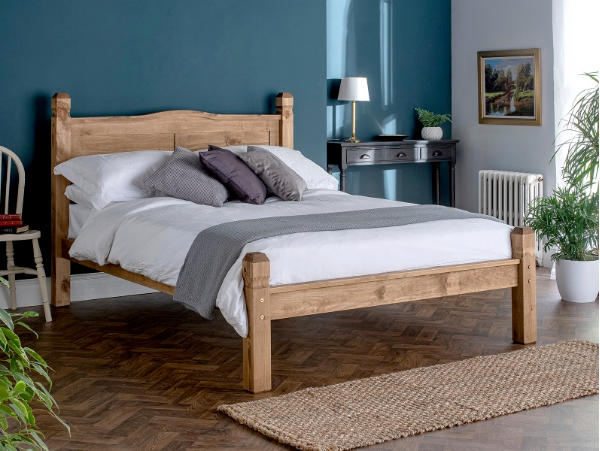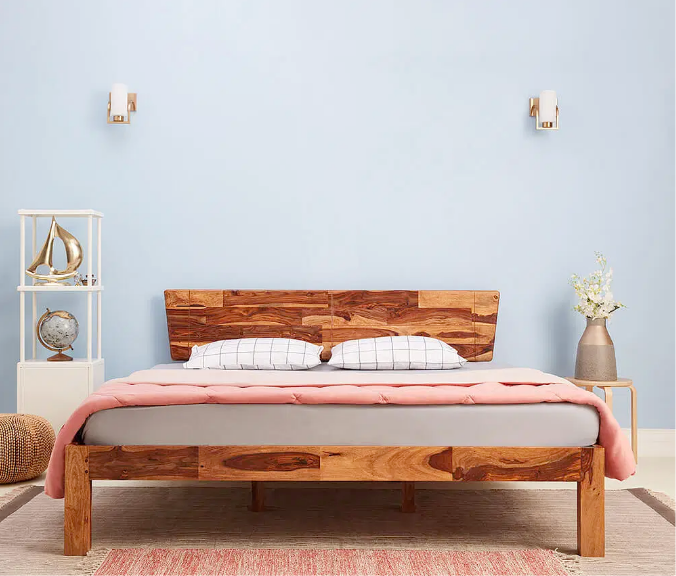***

IMPORTING NECESSARY LIBRARY

In [18]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

LABELING THE DATA

In [19]:
image_filenames = ['bed1.png', 'bed2.png', 'bed5.png', 'bed6.png', 'bed3.png', 'bed4.png', 'bed7.png', 'bed8.png','bed9.png','bed10.png','bed11.png','bed12.png','bed13.png','bed14.png','bed15.png','bed16.png','bed17.png','bed18.png','bed19.png','bed20.png']
labels = ['perpendicular', 'perpendicular', 'angle', 'angle', 'perpendicular', 'perpendicular', 'angle', 'angle','angle','perpendicular','angle','angle','perpendicular','angle', 'angle','angle','perpendicular', 'perpendicular', 'angle','perpendicular']

In [20]:
data = {'image_filename': image_filenames, 'label': labels}

In [21]:
df = pd.DataFrame(data)

In [22]:
df.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')

Create an ImageDataGenerator for data augmentation and preprocessing.
 since we do not much data so for 
Increased Training Data we used .

In [23]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)


In [24]:
image_directory = '/content/images' 

 Defining target image size, batch size, and class mode

In [25]:
target_size = (224, 224)
batch_size = 16
class_mode = 'binary'

 Create a data generator for training and validation

In [26]:
train_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=image_directory,
    x_col='image_filename',
    y_col='label',
    subset='training',
    batch_size=batch_size,
    shuffle=True,
    target_size=target_size,
    class_mode=class_mode
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=image_directory,
    x_col='image_filename',
    y_col='label',
    subset='validation',
    batch_size=batch_size,
    shuffle=True,
    target_size=target_size,
    class_mode=class_mode
)

Found 16 validated image filenames belonging to 2 classes.
Found 4 validated image filenames belonging to 2 classes.


In [27]:
x_train, y_train = next(train_generator)
x_valid, y_valid = next(valid_generator)

** convolutional neural network (CNN) model**

In [28]:
model = tf.keras.Sequential([
    tf.keras.applications.MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compiling the model

In [29]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


 Training the model

In [30]:
epochs = 10
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
1/1 [==============================] - 25s 25s/step - loss: 0.6906 - accuracy: 0.6875 - val_loss: 0.5940 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.5665 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5059 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4073 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 8.8342e-04 - accuracy: 1.0000 - val_loss: 0.3199 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 5.5176e-04 - accuracy: 1.0000 - val_loss: 0.2494 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 3.7328e-04 - accuracy: 1.0000 - val_loss: 0.1719 - val_accuracy: 1.0000
Epoch 8/10
1/1 [===========

Ploting the training and validation loss over epochs. visualisation of training and validation loss

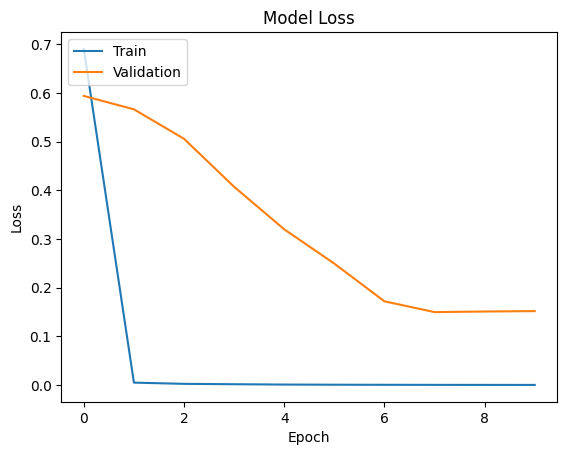

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Ploting the training and validation accuracy over epochs

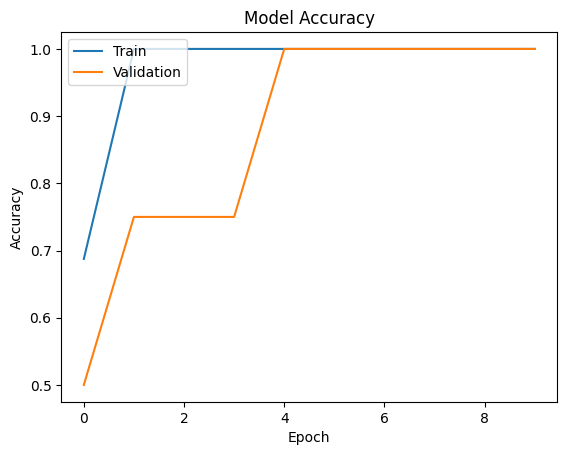

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Making predictions on the validation set

In [33]:

y_pred = model.predict(x_valid)
y_pred = np.round(y_pred).flatten()

accuracy = np.mean(y_pred == y_valid)
precision = tf.keras.metrics.Precision()(y_valid, y_pred).numpy()
recall = tf.keras.metrics.Recall()(y_valid, y_pred).numpy()
f1_score = 2 * (precision * recall) / (precision + recall)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

1/1 [==============================] - 1s 1s/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


1/1 [==============================] - 0s 144ms/step


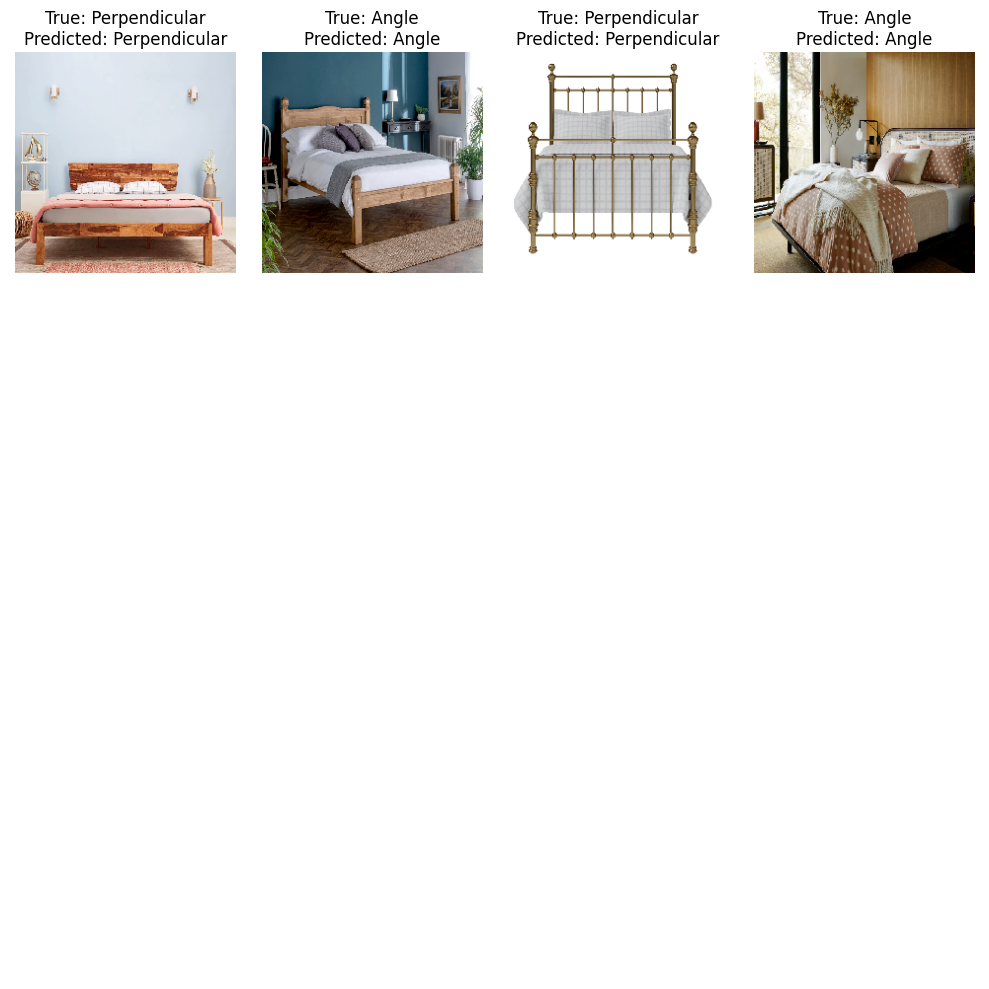

In [34]:

predictions = model.predict(x_valid)
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < len(x_valid):
      
        ax.imshow(x_valid[i])
        ax.axis('off')

      
        true_label = 'Perpendicular' if y_valid[i] == 1 else 'Angle'
        
        if i < len(predicted_labels):
            predicted_label = 'Perpendicular' if predicted_labels[i] == 1 else 'Angle'
            ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}')
        else:
            ax.set_title(f'True: {true_label}')
    else:
       
        ax.axis('off')

plt.tight_layout()
plt.show()